## Cluster Analysis of Indonesian Province Based on Household Primary Cooking Fuel Using K-Means

- Ahmad Alfarrel Ghazali (09011282126100)
- Rahmatulloh (09011282126102)
- Aryo Prabowo (09011282126113)

In [18]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data_real.csv")

In [3]:
df.head()

,Province,Electricity,LPG,Kerosene,Charcoal/Briquetts,Wood,Other
0,Aceh,0.11,64.61,3.97,0.00,28.82,2.49
1,Sumatera Utara,0.59,67.92,6.32,0.01,23.80,1.37
2,Sumatera Barat,0.31,23.47,25.54,0.00,49.22,1.46
3,Riau,0.58,69.54,9.70,3.62,14.56,2.00
4,Jambi,0.41,54.67,8.52,2.89,32.66,0.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Province            33 non-null     object 
 1   Electricity         33 non-null     float64
 2   LPG                 33 non-null     float64
 3   Kerosene            33 non-null     float64
 4   Charcoal/Briquetts  33 non-null     float64
 5   Wood                33 non-null     float64
 6   Other               33 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.9+ KB


In [5]:
X = df[["Electricity", "LPG", "Kerosene", "Charcoal/Briquetts", "Wood", "Other"]]

Listrik, LPG, Minyak tanah, Batu bara, Kayu, dan lain-lain.

In [6]:
normalized_X = preprocessing.normalize(X)

K = 2 to K = 5

## Silhouette Coefficient

In [8]:
k = [2, 3, 4, 5]
sc = []

for i in k:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(normalized_X)
    sc.append(silhouette_score(normalized_X, kmeans.labels_,))

In [9]:
pd.DataFrame({"K": k, "SC": sc})

,K,SC
0,2,0.621739
1,3,0.487013
2,4,0.417037
3,5,0.443671


The optimal Silhouette Coefficient value is resulted from K = 2. The next optimal Silhouette
Coefficient value is from K = 3. Therefore, the system will display a cluster membership table and
map.

In [10]:
locs = pd.read_csv("loc_real.csv")
locs.head()

,Province,lat,lng
0,Aceh,5.5500,95.3175
1,Sumatera Utara,3.6667,98.6667
2,Sumatera Barat,-0.9556,100.3606
3,Riau,0.5333,101.4500
4,Jambi,-1.5900,103.6100


## K = 2

In [11]:
kmeans_2 = KMeans(n_clusters=2, init="k-means++", random_state=42)
kmeans_2.fit(normalized_X)
kmeans_2.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [12]:
df_2 = df.copy()
df_2["labels"] = kmeans_2.labels_

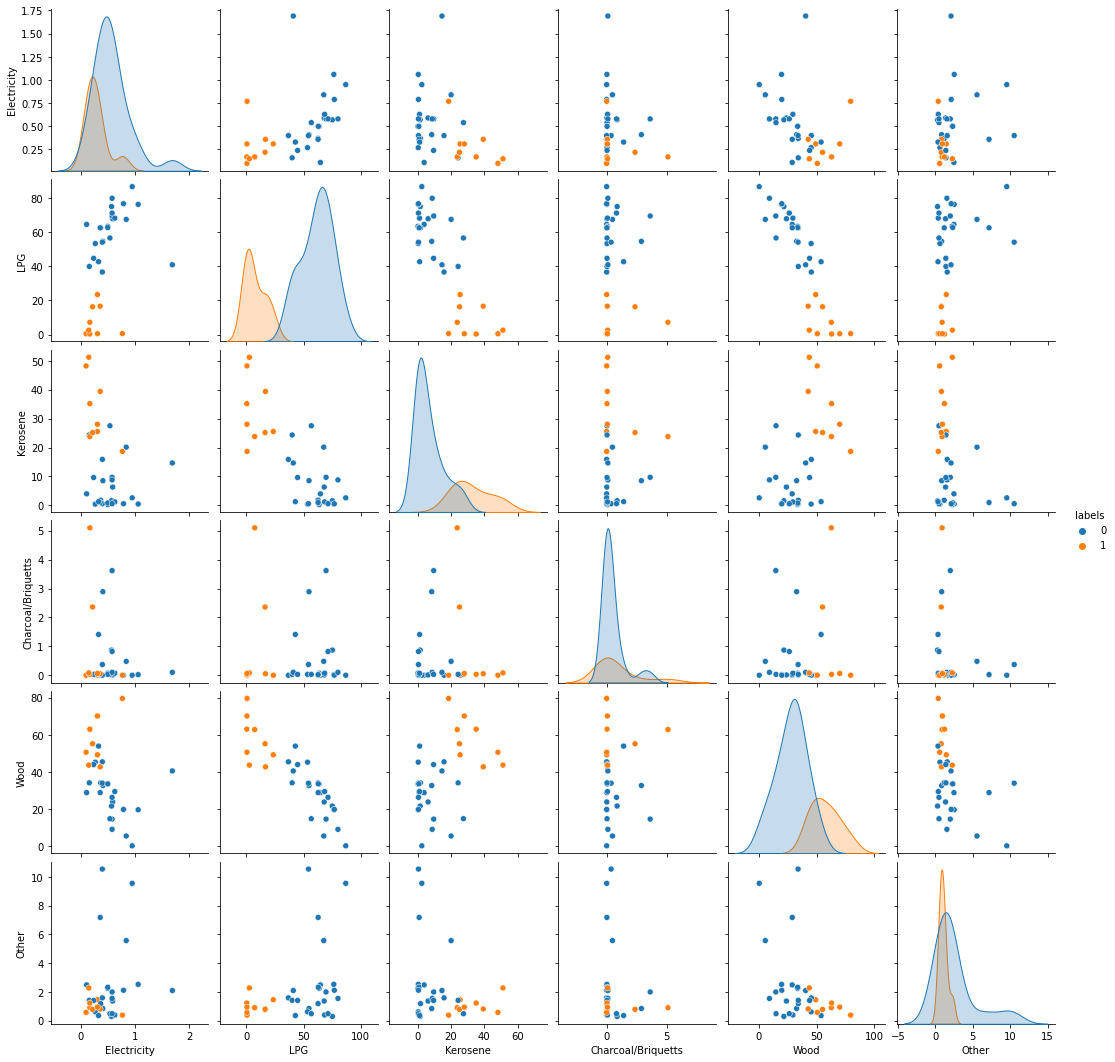

In [21]:
sns.pairplot(df_2, hue="labels")

## Analisis Klustering dengan K = 2

### Bahan Bakar Listrik

<AxesSubplot:xlabel='Electricity', ylabel='Density'>

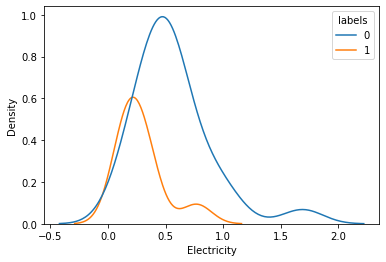

In [44]:
sns.kdeplot(data=df_2, x="Electricity", hue="labels")

Dilihat dari data, Bahan bakar listrik masih sangat sedikit, yaitu kebanyakan di bawah 1%.
Jika dilihat dari kluster 0 (biru), maka kebanyakan masyarakat menggunakan bahan bakar listrik di titik 0.5%, sedangkan kluster 1 (kuning) lebih sedikit penggnaannya, yaitu 0.2%.

### Bahan Bakar LPG

<AxesSubplot:xlabel='LPG', ylabel='Density'>

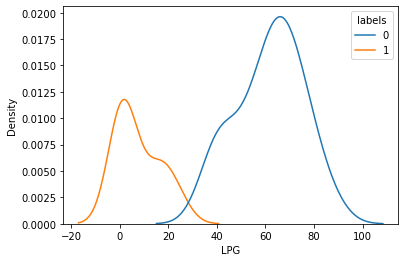

In [45]:
sns.kdeplot(data=df_2, x="LPG", hue="labels")

Masyarakat Indonesia kebanyakan menggunakan LPG, yang mana didominasi oleh kluster 0 (biru) dari 20% hingga 100% dengan pengguna terbanyak terdapat pada 65%. Kluster 1 (kuning) masih sedikit yang menggunakan LPG.

### Bahan Bakar Minyak Tanah

<AxesSubplot:xlabel='Kerosene', ylabel='Density'>

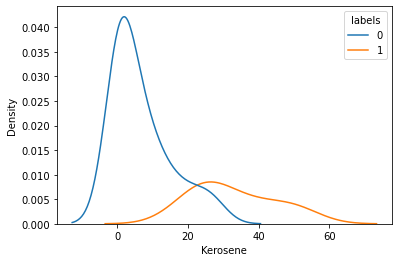

In [48]:
sns.kdeplot(data=df_2, x="Kerosene", hue="labels")

Pada kluster 0 (biru), penggunaan minyak tanah sudah sangat sedikit. Namun demikian, kluster 1 (kuning), penggunaan minyak tanah berada pada tingkat menengah keatas, namun tidak banyak.

### Bahan Bakar Batu Bara

<AxesSubplot:xlabel='Charcoal/Briquetts', ylabel='Density'>

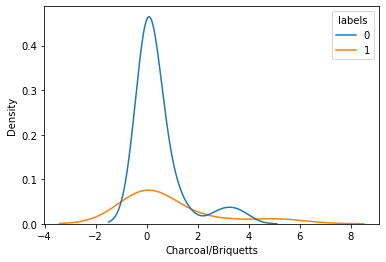

In [52]:
sns.kdeplot(data=df_2, x="Charcoal/Briquetts", hue="labels")

Batu bara sudah banyak yang tidak memakainya, sehingga kedua kuster mendominasi pada angka 0 atau jarang dipakai.

### Bahan Bakar Kayu

<AxesSubplot:xlabel='Wood', ylabel='Density'>

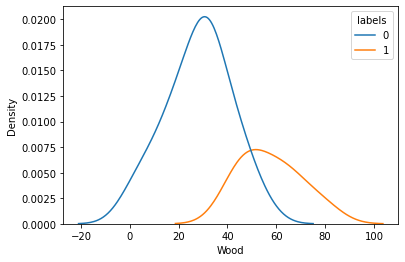

In [50]:
sns.kdeplot(data=df_2, x="Wood", hue="labels")

Penggunaan kayu didominasi oleh kluster 1 (kuning) (58%) karena persentase penggunaannya lebih tinggi daripada kluster 0 (biru) (sekitar 30%)

### Bahan Bakar Lain

<AxesSubplot:xlabel='Other', ylabel='Density'>

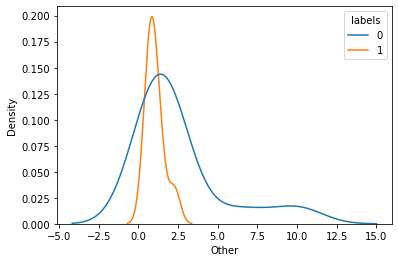

In [51]:
sns.kdeplot(data=df_2, x="Other", hue="labels")

Penggunaan bahan bakar lainnya tidak terlalu banyak yang menggunakannya. Tertutama pada kluster 1 (kuning)

## Kesimpulan

Dilihat dari plot bahwa kluster 0 (biru) termasuk kategori provinsi yang modern. Hal ini dapat dilihat dari tingginya penggunaan LPG, persentasi listrik yang lebih tinggi dari kluster 1 (kuning), dan rendahnya penggunaan minyak tanah, batu bara, dan kayu. sedangkan kluster 1 (kuning) masuk ke kategori tradisional. Hal ini dilihat dari rendahnya jumlah pemakai LPG dari kluster 0 (biru) namun penggunaan minyak tanah dan kayu masih tinggi.

In [14]:
import folium

colors = ["red", "green"]
m = folium.Map(location=[0.7893, 113.9213], zoom_start=4.5)
for i in range(len(locs)):
    folium.Marker([locs["lat"][i], locs["lng"][i]], icon=folium.Icon(color=colors[df_2["labels"][i]],icon='off')).add_to(m)
m

Hijau = Medium-high use of electricity, medium-high use of LPG, very low use of kerosene, very low use of charcoal / briquettes, very lowmedium use of wood, and low-medium use of other fuel. This cluster depicts more modern provinces in Indonesia.

Merah = With characteristic of low use of electricity, low use of LPG, medium-high use of kerosene, low-medium use of charcoal/briquettes, high use of wood, and very low use of other fuel. This cluster depicts more traditional provinces in Indonesia.

## K = 3

In [15]:
kmeans_3 = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_3.fit(normalized_X)
kmeans_3.labels_

array([2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0,
       2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1])

In [16]:
df_3 = df.copy()
df_3["labels"] = kmeans_3.labels_

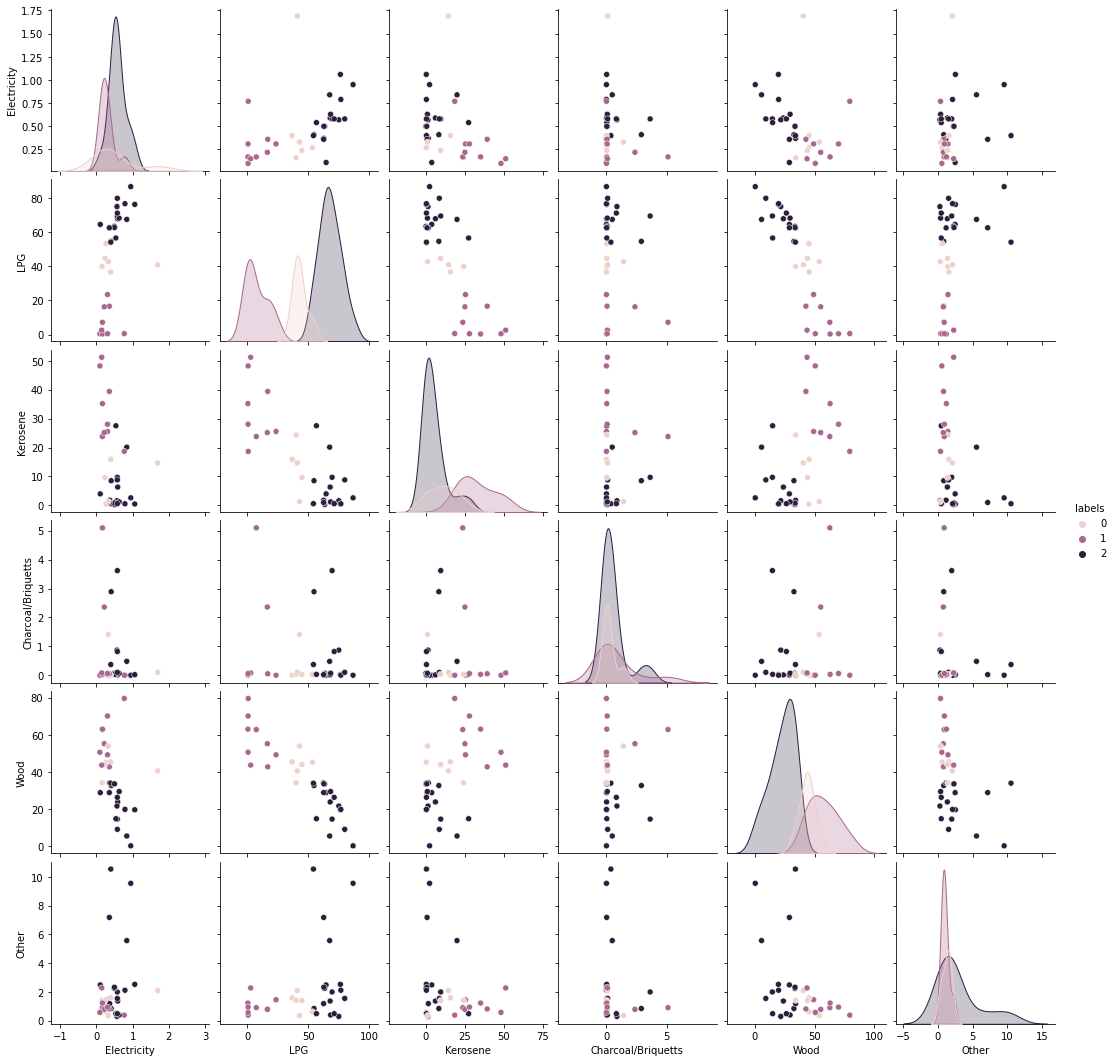

In [22]:
plt = 
sns.pairplot(df_3, hue="labels")

In [17]:
import folium

colors = ["red", "green", "blue"]
m = folium.Map(location=[0.7893, 113.9213], zoom_start=4.5)
for i in range(len(locs)):
    folium.Marker([locs["lat"][i], locs["lng"][i]], icon=folium.Icon(color=colors[df_3["labels"][i]] ,icon='off')).add_to(m)
m

Merah = medium-high use of electricity, high use of LPG, very low use of kerosene, very low use of charcoal/briquettes, low use of wood, and
high use of other fuel (other fuel include not cooking). This cluster depicts modern province in Indonesia.

Biru = characteristic of low use of electricity, high use of LPG, very low use of kerosene, very low use of charcoal/briquettes, low-medium use of wood, very low use
of other fuel.

Hijau = characteristic of very low use of electricity, very low use of LPG, medium-high use of kerosene, very low use of charcoal/briquettes, high use of wood, very low
use of other fuel. This cluster depicts more traditional province in Indonesia.